In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
def draw(hand:list):
    hand.append(np.random.choice([1,2,3,4,5,6,7,8,9,10,10,10,10]))
    return hand

def is_dealer_stand(points:int):
    return points >= 17

def is_blast(points:int):
    return points > 21

def set_ini_hand(card_1 = None, card_2  = None):
    hand = []
    if card_1:
        hand.append(card_1)
    else:
        hand = draw(hand)
    if card_2:
        hand.append(card_2)
    else:
        hand = draw(hand)
    return hand

def adjusted_points(hand:list):
    num_of_ace = hand.count(1)
    if num_of_ace == 0:
        return sum(hand)
    for i in range(1, num_of_ace + 1):
        if sum(hand) + 10 * i > 21:
            return sum(hand) + 10 * (i - 1)
    return sum(hand) + 10 * num_of_ace

def choose_act(ini_act, result_count, hand):
    if ini_act < 0:
        #TODO finish choosing the action
        # assign the current posterior as score, softmax for all actions scores as probability to explore
        stand_poste = result_count[0][0]*1.0 / sum(result_count[0])
        hit_poste = result_count[1][0]*1.0 / sum(result_count[1])
        double_poste = result_count[2][0]*1.0 / sum(result_count[2])
        total_probability = stand_poste + hit_poste + double_poste
        ini_act = np.random.choice([0,1,2], p=[stand_poste/total_probability, hit_poste/total_probability, double_poste/total_probability])
        return ini_act, ini_act
    else:
        points = adjusted_points(hand)
        if points < 12:
            return 1, ini_act
        elif points >= 12 and points <= 15:
            return np.random.choice([0,1], p=[0.2, 0.8]), ini_act
        elif points >= 16 and points <= 17:
            return np.random.choice([0,1], p=[0.4, 0.6]), ini_act
        elif points == 18:
            return np.random.choice([0,1], p=[0.6, 0.4]), ini_act
        elif points == 19:
            return np.random.choice([0,1], p=[0.8, 0.2]), ini_act
        elif points == 20:
            return np.random.choice([0,1], p=[0.9, 0.1]), ini_act
        else:
            return 0, ini_act

def judge(dealer_hand:list, player_hand:list):
    dealer_points = adjusted_points(dealer_hand)
    player_points = adjusted_points(player_hand)
    if dealer_points > 21 and player_points > 21:
        win_ratio = 0
    elif dealer_points > 21 and player_points <= 21:
        win_ratio = 1
    elif dealer_points <= 21 and player_points > 21:
        win_ratio = -1
    elif dealer_points > player_points:
        win_ratio = -1
    elif dealer_points < player_points:
        win_ratio = 1
    else:
        win_ratio = 0
    return win_ratio

def cal_probabilities(result_count, prior_his, posterior_his):
    winning_game = 0
    total_game = 0
    for i in range(0, 3):
        total_game += sum(result_count[i])
        winning_game += result_count[i][0]
        posterior_his[i].append(result_count[i][0]*1.0 / sum(result_count[i]))
    prior_his.append(winning_game*1.0/total_game)
    return None

In [21]:
action_dic = {0: 'stand', 1: 'hit', 2: 'double bet'}
result_count = [[10,10],[10,10],[10,10]] # the [win,lose] result for each action
prior_his = []
posterior_his = [[],[],[]]

cal_probabilities(result_count, prior_his, posterior_his)

In [22]:
iter_time = int(input("iteration number:"))
player_hand_first = int(input("P1 = "))
player_hand_second = int(input("P2 = "))
dealer_hand_first = int(input("D1 = "))
if iter_time <= 0:
    iter_time = 2000

for i in range(iter_time):
    player_hand = set_ini_hand(player_hand_first,player_hand_second)
    dealer_hand = set_ini_hand(dealer_hand_first)

    game_end = False
    win_ratio = 0
    multiplier = 1
    player_stand = False
    ini_act = -1
    player_blast = False
    while not game_end:
        if not player_stand:
            action, ini_act = choose_act(ini_act, result_count, player_hand)

            if action == 0:
                player_stand = True

            elif action == 1:
                player_hand = draw(player_hand)
                if is_blast(adjusted_points(dealer_hand)):
                    player_blast = True
                    player_stand = True

            elif action == 2:
                multiplier = 2
                player_hand = draw(player_hand)
                if is_blast(adjusted_points(dealer_hand)):
                    player_blast = True
                player_stand = True
            else:
                print("the action code", action, "is out of range. Press [Y/N] to continue")
                if input() == 'N' or 'n':
                    exit()
        if not is_dealer_stand(adjusted_points(dealer_hand)):
            dealer_hand = draw(dealer_hand)

        if player_stand == True and is_dealer_stand(adjusted_points(dealer_hand)):
            win_ratio = judge(dealer_hand, player_hand)
            game_end = True

    if win_ratio > 0:
        result_count[ini_act][0] += 1
    elif win_ratio < 0:
        result_count[ini_act][1] += 1
    cal_probabilities(result_count, prior_his, posterior_his)

iteration number:50000
P1 = 1
P2 = 3
D1 = 8


In [23]:
print("game record", result_count)
print("prior history", prior_his[-10:-1])
print("posterior history:")
for i in posterior_his:
    print("\t", i[-5:-1])

game record [[2662, 8117], [9405, 9421], [7064, 9952]]
prior history [0.41040933665150603, 0.41040053204041793, 0.4103917278070966, 0.41038292395151776, 0.4103741204736571, 0.41036531737349036, 0.41035651465099315, 0.41034771230614125, 0.4103603603603604]
posterior history:
	 [0.24700751600630974, 0.24700751600630974, 0.24698459825570607, 0.24698459825570607]
	 [0.4995750557739297, 0.4995750557739297, 0.4995750557739297, 0.4995750557739297]
	 [0.4151287175267427, 0.41510431971789596, 0.41510431971789596, 0.4151386929948284]


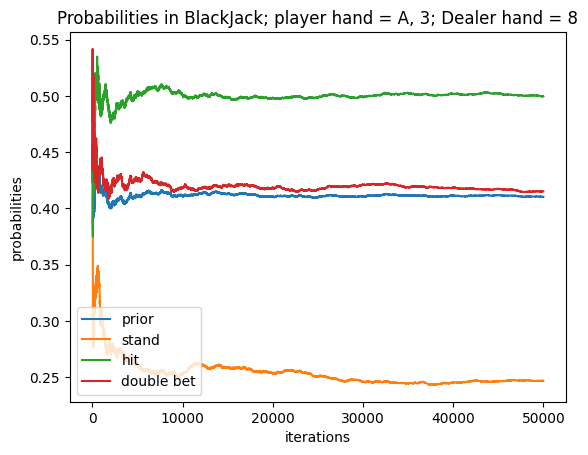

In [28]:
X = range(0, iter_time+1)
plt.plot(X, prior_his, label = 'prior')
label_list = ['stand', 'hit', 'double bet']
for i in range(0,3):
  plt.plot(X, posterior_his[i], label = label_list[i])

plt.xlabel("iterations")
plt.ylabel("probabilities")
plt.title("Probabilities in BlackJack; player hand = A, 3; Dealer hand = 8")
plt.legend()
plt.show()